In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML: Siren Detector")

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [ ]:
labels = np.array(df['classID'])
labels.shape

(8732,)

In [ ]:
features = np.load('UrbanSound8K/features.npy')
print(features.shape)

(8732, 128)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=0,stratify=labels)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6985, 128) (1747, 128)
(6985,) (1747,)


In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")
print(y_train.shape, y_test.shape)

(6985, 10) (1747, 10)


Load the augmented dataset

In [ ]:
features_aug = np.load('UrbanSound8K/features_aug.npy')
features_aug.shape

(34928, 128)

In [ ]:
target_aug = np.load('UrbanSound8K/target_aug.npy')
target_aug.shape

(34928, 10)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(features_aug,target_aug,test_size=0.2,random_state=0,stratify=target_aug)
print(X_train_aug.shape, X_test_aug.shape)
print(y_train_aug.shape, y_test_aug.shape)

(27942, 128) (6986, 128)
(27942, 10) (6986, 10)


# DECISION TREE


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6725815684029766

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       200
           1       0.58      0.52      0.55        86
           2       0.50      0.50      0.50       200
           3       0.61      0.59      0.60       200
           4       0.73      0.71      0.72       200
           5       0.79      0.82      0.81       200
           6       0.57      0.47      0.51        75
           7       0.80      0.81      0.80       200
           8       0.73      0.73      0.73       186
           9       0.50      0.55      0.53       200

   micro avg       0.67      0.67      0.67      1747
   macro avg       0.66      0.65      0.66      1747
weighted avg       0.67      0.67      0.67      1747
 samples avg       0.67      0.67      0.67      1747



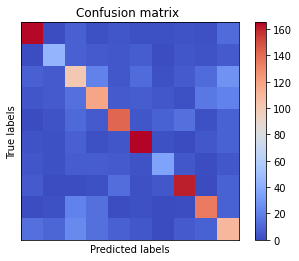

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_aug, y_train_aug)
y_pred_aug = clf.predict(X_test_aug)
accuracy_score(y_test_aug, y_pred_aug)

0.8827655310621243

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_aug, y_pred_aug))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       800
           1       0.83      0.86      0.85       343
           2       0.82      0.82      0.82       800
           3       0.88      0.88      0.88       800
           4       0.90      0.88      0.89       800
           5       0.92      0.94      0.93       800
           6       0.83      0.84      0.84       299
           7       0.93      0.93      0.93       800
           8       0.90      0.92      0.91       744
           9       0.85      0.81      0.83       800

   micro avg       0.88      0.88      0.88      6986
   macro avg       0.88      0.88      0.88      6986
weighted avg       0.88      0.88      0.88      6986
 samples avg       0.88      0.88      0.88      6986



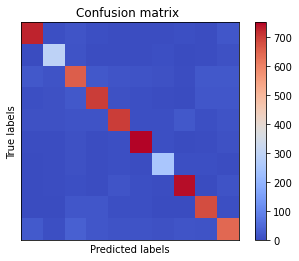

In [ ]:
y_pred_aug = np.argmax(y_pred_aug, axis = 1)
y_true_aug = np.argmax(y_test_aug, axis = 1)

cm = confusion_matrix(y_true_aug, y_pred_aug)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# RANDOM FOREST

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6536920435031482

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       200
           1       1.00      0.38      0.55        86
           2       0.92      0.47      0.63       200
           3       0.97      0.56      0.71       200
           4       0.96      0.75      0.84       200
           5       0.99      0.84      0.91       200
           6       1.00      0.49      0.66        75
           7       0.98      0.84      0.91       200
           8       0.99      0.74      0.85       186
           9       0.93      0.34      0.50       200

   micro avg       0.98      0.65      0.78      1747
   macro avg       0.97      0.63      0.75      1747
weighted avg       0.97      0.65      0.77      1747
 samples avg       0.65      0.65      0.65      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


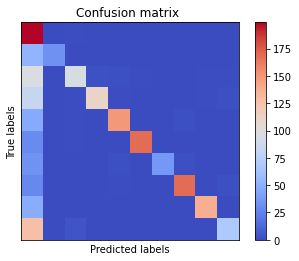

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train_aug, y_train_aug)
y_pred_aug = clf.predict(X_test_aug)
accuracy_score(y_test_aug, y_pred_aug)

0.9106784998568566

In [ ]:
print(classification_report(y_test_aug, y_pred_aug))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       800
           1       1.00      0.84      0.91       343
           2       0.99      0.86      0.92       800
           3       1.00      0.89      0.94       800
           4       1.00      0.90      0.95       800
           5       1.00      0.97      0.99       800
           6       1.00      0.81      0.90       299
           7       0.99      0.97      0.98       800
           8       1.00      0.95      0.97       744
           9       1.00      0.85      0.92       800

   micro avg       1.00      0.91      0.95      6986
   macro avg       1.00      0.90      0.95      6986
weighted avg       1.00      0.91      0.95      6986
 samples avg       0.91      0.91      0.91      6986



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


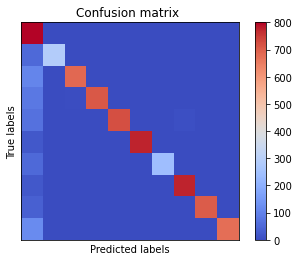

In [ ]:
y_pred_aug = np.argmax(y_pred_aug, axis = 1)
y_true_aug = np.argmax(y_test_aug, axis = 1)

cm = confusion_matrix(y_true_aug, y_pred_aug)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# XGBOOST

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
clf = XGBClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7590154550658271

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       200
           1       0.97      0.65      0.78        86
           2       0.62      0.73      0.67       200
           3       0.80      0.69      0.74       200
           4       0.76      0.73      0.75       200
           5       0.80      0.83      0.81       200
           6       0.88      0.67      0.76        75
           7       0.80      0.90      0.85       200
           8       0.86      0.75      0.80       186
           9       0.65      0.65      0.65       200

    accuracy                           0.76      1747
   macro avg       0.79      0.75      0.76      1747
weighted avg       0.77      0.76      0.76      1747



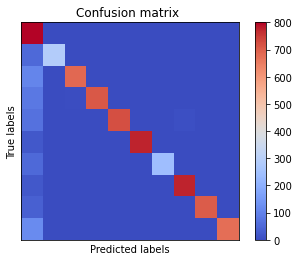

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
y_train_aug = np.argmax(y_train_aug, axis = 1)
y_test_aug = np.argmax(y_test_aug, axis = 1)

In [ ]:
clf = XGBClassifier(n_estimators=100)
clf.fit(X_train_aug, y_train_aug)
y_pred_aug = clf.predict(X_test_aug)
accuracy_score(y_test_aug, y_pred_aug)

0.7492127111365589

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_aug, y_pred_aug))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       800
           1       0.97      0.76      0.85       343
           2       0.56      0.69      0.62       800
           3       0.81      0.70      0.75       800
           4       0.79      0.74      0.77       800
           5       0.81      0.80      0.80       800
           6       0.87      0.63      0.73       299
           7       0.75      0.88      0.81       800
           8       0.85      0.80      0.82       744
           9       0.65      0.61      0.63       800

    accuracy                           0.75      6986
   macro avg       0.78      0.74      0.76      6986
weighted avg       0.76      0.75      0.75      6986



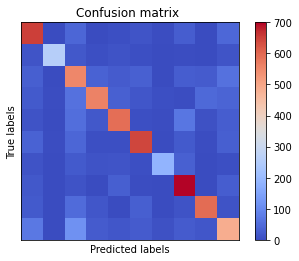

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_aug, y_pred_aug)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# Stacked Classifier

In [ ]:
estimators = [
              ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
              ('dct', DecisionTreeClassifier(random_state=42)) 
              ]
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(n_estimators=100)
)

In [ ]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(),
    verbose=1,
)

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8797939324556382

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       200
           1       0.97      0.84      0.90        86
           2       0.81      0.78      0.79       200
           3       0.85      0.82      0.84       200
           4       0.90      0.89      0.89       200
           5       0.94      0.94      0.94       200
           6       0.82      0.80      0.81        75
           7       0.93      0.93      0.93       200
           8       0.93      0.93      0.93       186
           9       0.74      0.88      0.80       200

    accuracy                           0.88      1747
   macro avg       0.88      0.87      0.88      1747
weighted avg       0.88      0.88      0.88      1747



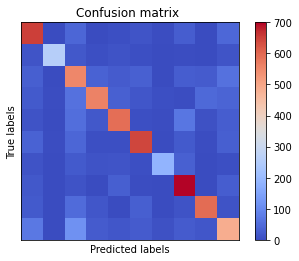

In [ ]:
cm = confusion_matrix(y_test_aug, y_pred_aug)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
estimators = [
              ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
              ('dct', DecisionTreeClassifier(random_state=42)) 
              ]
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(n_estimators=100)
)

In [ ]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(),
    verbose=1,
)

In [ ]:
clf.fit(X_train_aug, y_train_aug)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.1s finished


StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [ ]:
y_pred_aug = clf.predict(X_test_aug)
accuracy_score(y_test_aug, y_pred_aug)

0.9833953621528772

In [ ]:
print(classification_report(y_test_aug, y_pred_aug))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       800
           1       1.00      0.98      0.99       343
           2       0.97      0.97      0.97       800
           3       0.98      0.99      0.98       800
           4       0.98      0.96      0.97       800
           5       1.00      1.00      1.00       800
           6       0.98      0.99      0.99       299
           7       0.98      0.99      0.99       800
           8       0.99      0.99      0.99       744
           9       0.98      0.97      0.97       800

    accuracy                           0.98      6986
   macro avg       0.98      0.98      0.98      6986
weighted avg       0.98      0.98      0.98      6986



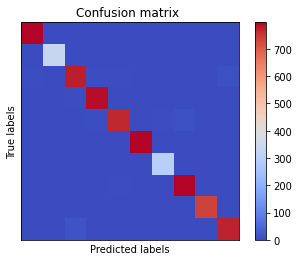

In [ ]:
cm = confusion_matrix(y_test_aug, y_pred_aug)
plt.imshow(cm, cmap=plt.cm.coolwarm)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()